In [1]:
#import library
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=20,
                                                 directory='../input/traindulieu/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=20,
                                                 directory='../input/testdulieu/test',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1152 images belonging to 12 classes.
Found 72 images belonging to 12 classes.


In [3]:
train_dataset.classes
train_dataset.class_indices

{'L1': 0,
 'L10': 1,
 'L11': 2,
 'L12': 3,
 'L2': 4,
 'L3': 5,
 'L4': 6,
 'L5': 7,
 'L6': 8,
 'L7': 9,
 'L8': 10,
 'L9': 11}

In [4]:
import numpy as np  
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #  :batch... : chuan cua ANN
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical #  de dam bao do hcinh xac cao 
from keras import callbacks 
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong

In [5]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

2022-06-22 19:10:42.507062: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=40,epochs=100,verbose=1,validation_data=validation_dataset)

2022-06-22 19:10:43.148514: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
58/58 [==============================] - 63s 1s/step - loss: 2.3820 - accuracy: 0.1589 - val_loss: 1.8385 - val_accuracy: 0.3056
Epoch 2/100
58/58 [==============================] - 69s 1s/step - loss: 1.6551 - accuracy: 0.3429 - val_loss: 1.4078 - val_accuracy: 0.3333
Epoch 3/100
58/58 [==============================] - 71s 1s/step - loss: 1.4167 - accuracy: 0.4184 - val_loss: 1.6953 - val_accuracy: 0.3056
Epoch 4/100
58/58 [==============================] - 64s 1s/step - loss: 1.2036 - accuracy: 0.4861 - val_loss: 1.1479 - val_accuracy: 0.4444
Epoch 5/100
58/58 [==============================] - 64s 1s/step - loss: 1.0612 - accuracy: 0.5347 - val_loss: 1.1985 - val_accuracy: 0.5000
Epoch 6/100
58/58 [==============================] - 64s 1s/step - loss: 0.9396 - accuracy: 0.6016 - val_loss: 1.0518 - val_accuracy: 0.5000
Epoch 7/100
58/58 [==============================] - 65s 1s/step - loss: 0.8443 - accuracy: 0.6389 - val_loss: 1.1504 - val_accuracy: 0.4167
Epoch 8/100
5

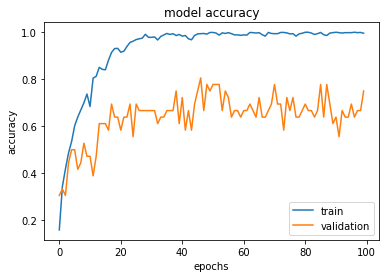

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [10]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  2.0187671184539795
Độ chính xác  0.75


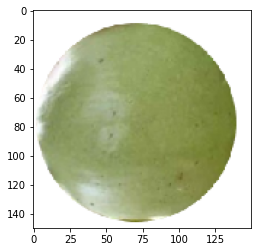

Vú sữa màu xanh , hình dạng tròn , loại bình thường
99.95662569999695 % dự đoán chính xác


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L1/L1 (1).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

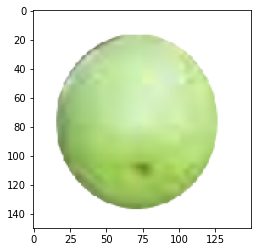

Vú sữa màu xanh , hình dạng tròn , loại bình thường
99.13942217826843 % dự đoán chính xác


In [12]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L1/L1 (10).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

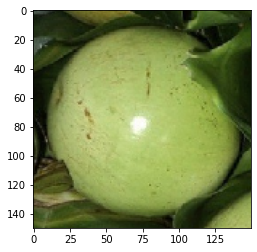

Vú sữa màu xanh , hình dạng tròn , loại bình thường
99.94140863418579 % dự đoán chính xác


In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L1/L1 (12).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

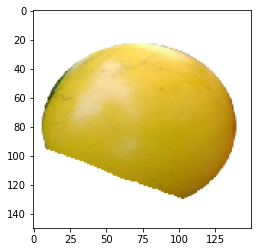

Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật
61.23618483543396 % dự đoán chính xác


In [14]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L10/L10 (2).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

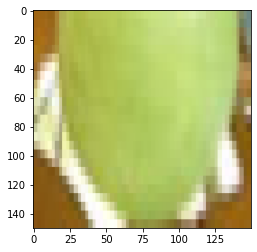

Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường 
96.27360701560974 % dự đoán chính xác


In [15]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L11/L11 (16).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

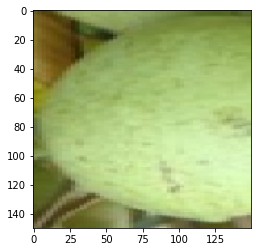

Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật
99.95465874671936 % dự đoán chính xác


In [16]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L11/L11 (30).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

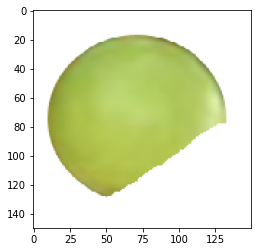

Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật
99.9998927116394 % dự đoán chính xác


In [17]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L11/L11 (5).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

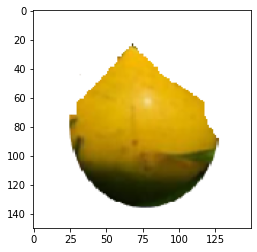

Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường 
99.99980926513672 % dự đoán chính xác


In [18]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L12/L12 (10).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

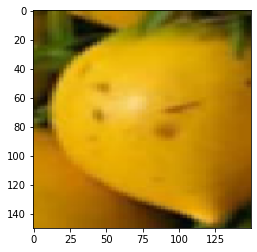

Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật
97.12817668914795 % dự đoán chính xác


In [19]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L12/L12 (19).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

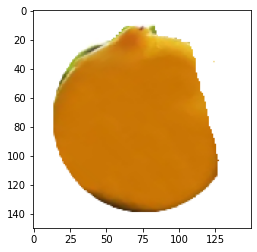

Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật
99.99977350234985 % dự đoán chính xác


In [20]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L12/L12 (29).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

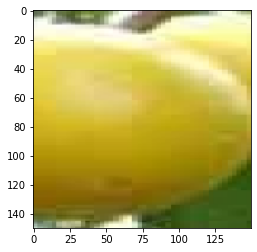

Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật
99.99926090240479 % dự đoán chính xác


In [21]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L12/L12 (44).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

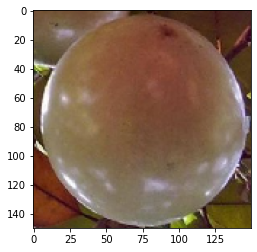

Vú sữa hồng , hình dạng tròn, loại bình thường
98.85141253471375 % dự đoán chính xác


In [22]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L2/L2 (2).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

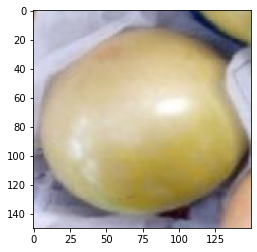

Vú sữa hồng , hình dạng tròn, loại bình thường
100.0 % dự đoán chính xác


In [23]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L2/L2 (53).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

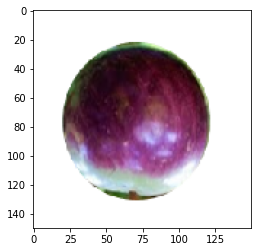

Vú sữa màu tím, hình dạng tròn, loại bình thường
95.48210501670837 % dự đoán chính xác


In [24]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L3/L3 (13).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

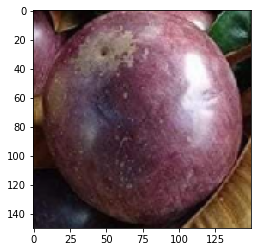

Vú sữa màu tím, hình dạng tròn, loại khuyết tật
99.67672824859619 % dự đoán chính xác


In [25]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L3/L3 (1).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

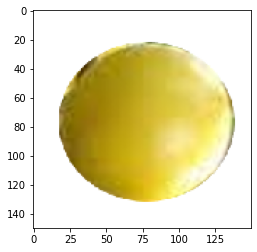

Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường 
99.98737573623657 % dự đoán chính xác


In [26]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L4/L4 (10).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

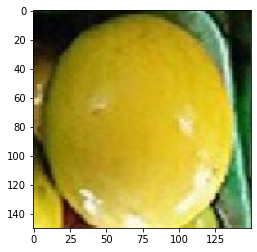

Vú sữa màu vàng , hình dạng tròn , loại bình thường
87.48038411140442 % dự đoán chính xác


In [27]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L4/L4 (16).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

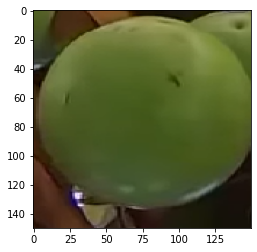

Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường 
98.91536831855774 % dự đoán chính xác


In [28]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L5/L5 (14).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

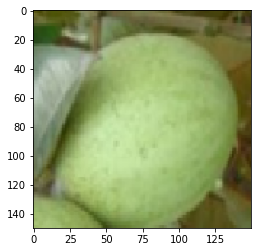

Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường 
99.98340606689453 % dự đoán chính xác


In [29]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L5/L5 (21).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

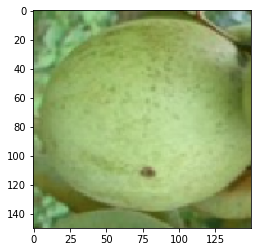

Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường 
99.99641180038452 % dự đoán chính xác


In [30]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L5/L5 (28).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

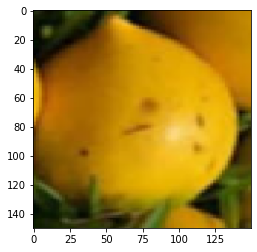

Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường 
98.5674798488617 % dự đoán chính xác


In [31]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L6/L6 (17).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

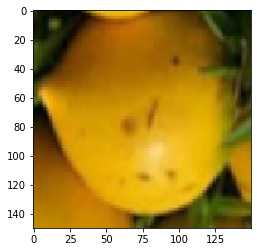

Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường 
79.57534193992615 % dự đoán chính xác


In [32]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L6/L6 (18).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

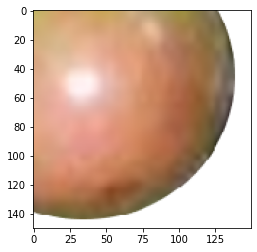

Vú sữa màu hồng , hình dạng tròn , loại khuyết tật 
100.0 % dự đoán chính xác


In [33]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L8/L8 (22).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

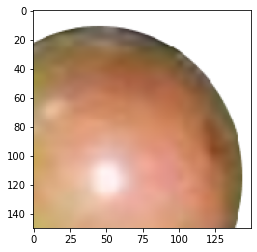

Vú sữa màu hồng , hình dạng tròn , loại khuyết tật 
100.0 % dự đoán chính xác


In [34]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L8/L8 (21).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

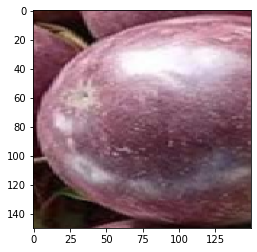

Vú sữa màu tím, hình dạng tròn, loại khuyết tật
96.05295658111572 % dự đoán chính xác


In [35]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L9/L9 (15).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

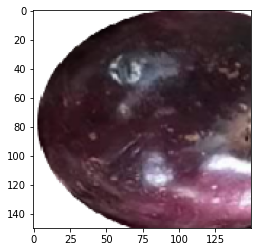

Vú sữa màu tím, hình dạng tròn, loại khuyết tật
100.0 % dự đoán chính xác


In [36]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L9/L9 (30).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

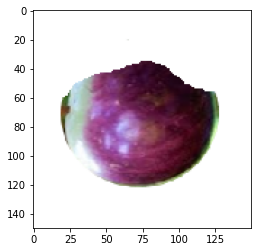

Vú sữa màu tím, hình dạng tròn, loại khuyết tật
99.99172687530518 % dự đoán chính xác


In [37]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L9/L9 (42).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")

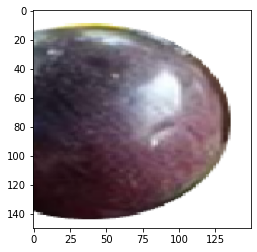

Vú sữa màu tím, hình dạng tròn, loại khuyết tật
99.36227202415466 % dự đoán chính xác


In [38]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testdulieu/test/L9/L9 (17).png"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Vú sữa màu xanh , hình dạng tròn , loại bình thường")
if(kq==1):
    print("Vú sữa màu vàng, hình dạng tròn, loại khuyết tật")
if(kq==2):
        print("Vú sữa xanh , hình dạng không tròn đều , loại khuyết tật")
if(kq==3):
     print("Vú sữa vàng, hình dạng không tròn đều, loại khuyết tật")
if(kq==4):
    print("Vú sữa hồng , hình dạng tròn, loại bình thường")
if(kq==5):
    print("Vú sữa màu tím, hình dạng tròn, loại bình thường")
if(kq==6):
     print("Vú sữa màu vàng , hình dạng tròn , loại bình thường")
if(kq==7):
     print("Vú sữa màu xanh , hình dạng không tròn đều, loại bình thường ")
if(kq==8):
    print("Vú sữa màu vàng, hình dạng không tròn đều , loại bình thường ")
if(kq==9):
     print("Vú sữa màu xành , hình dạng tròn, loại khuyết tật ")
if(kq==10):
       print("Vú sữa màu hồng , hình dạng tròn , loại khuyết tật ")
if(kq==11):
       print("Vú sữa màu tím, hình dạng tròn, loại khuyết tật") 
y_pred = model.predict(img)
x=y_pred.max()
x=x*100
print(x,"% dự đoán chính xác")